## Selenium library
**Try it out**

This jupyter notebook is designed to take you through the `selenium` library in Python, which is great at controlling your default web browser (usually Chrome) and scraping whatever you fancy off the internet. Be careful though, do NOT scrape websites that don't allow it. Your IP could forever be banned from visiting that website again.

Here, we make an attempt to scrape some data off of Craigslist. 

### Note -

1. I am using the Chrome web browser while doing this and I assume you have Chrome. 

2. You will need the chrome webdrive. Download it here - 
http://chromedriver.chromium.org/downloads

Extract the downloaded file on your local machine. I have extracted it to my Desktop so it's easy to access.

In [2]:
from selenium import webdriver

from string import punctuation

import nltk
from nltk.tokenize import word_tokenize


from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

### Sample Problem

Let's say I want to navigate to the website "https://vancouver.craigslist.ca" and look at all the articles on offer under the antiques section but only using code. How would I do that?

**Step 1:** *Fire up the chrome webdriver and navigate to the website*

In [3]:
# provide location to chromedriver and open chrome
chrome_path = r'C:/Users/sagar/Desktop/chromedriver'
driver = webdriver.Chrome(chrome_path)

# open the craiglist website
driver.get("https://vancouver.craigslist.ca")

After **Step 1**, a new chrome window would have opened up and loaded the cragslist webpage for you. Press F12. Then locate the 'Antiques' link, right click on it and say inspect. This would highlight in blue some text on the right window pane. Right click on that and select `Copy ->Copy XPath`

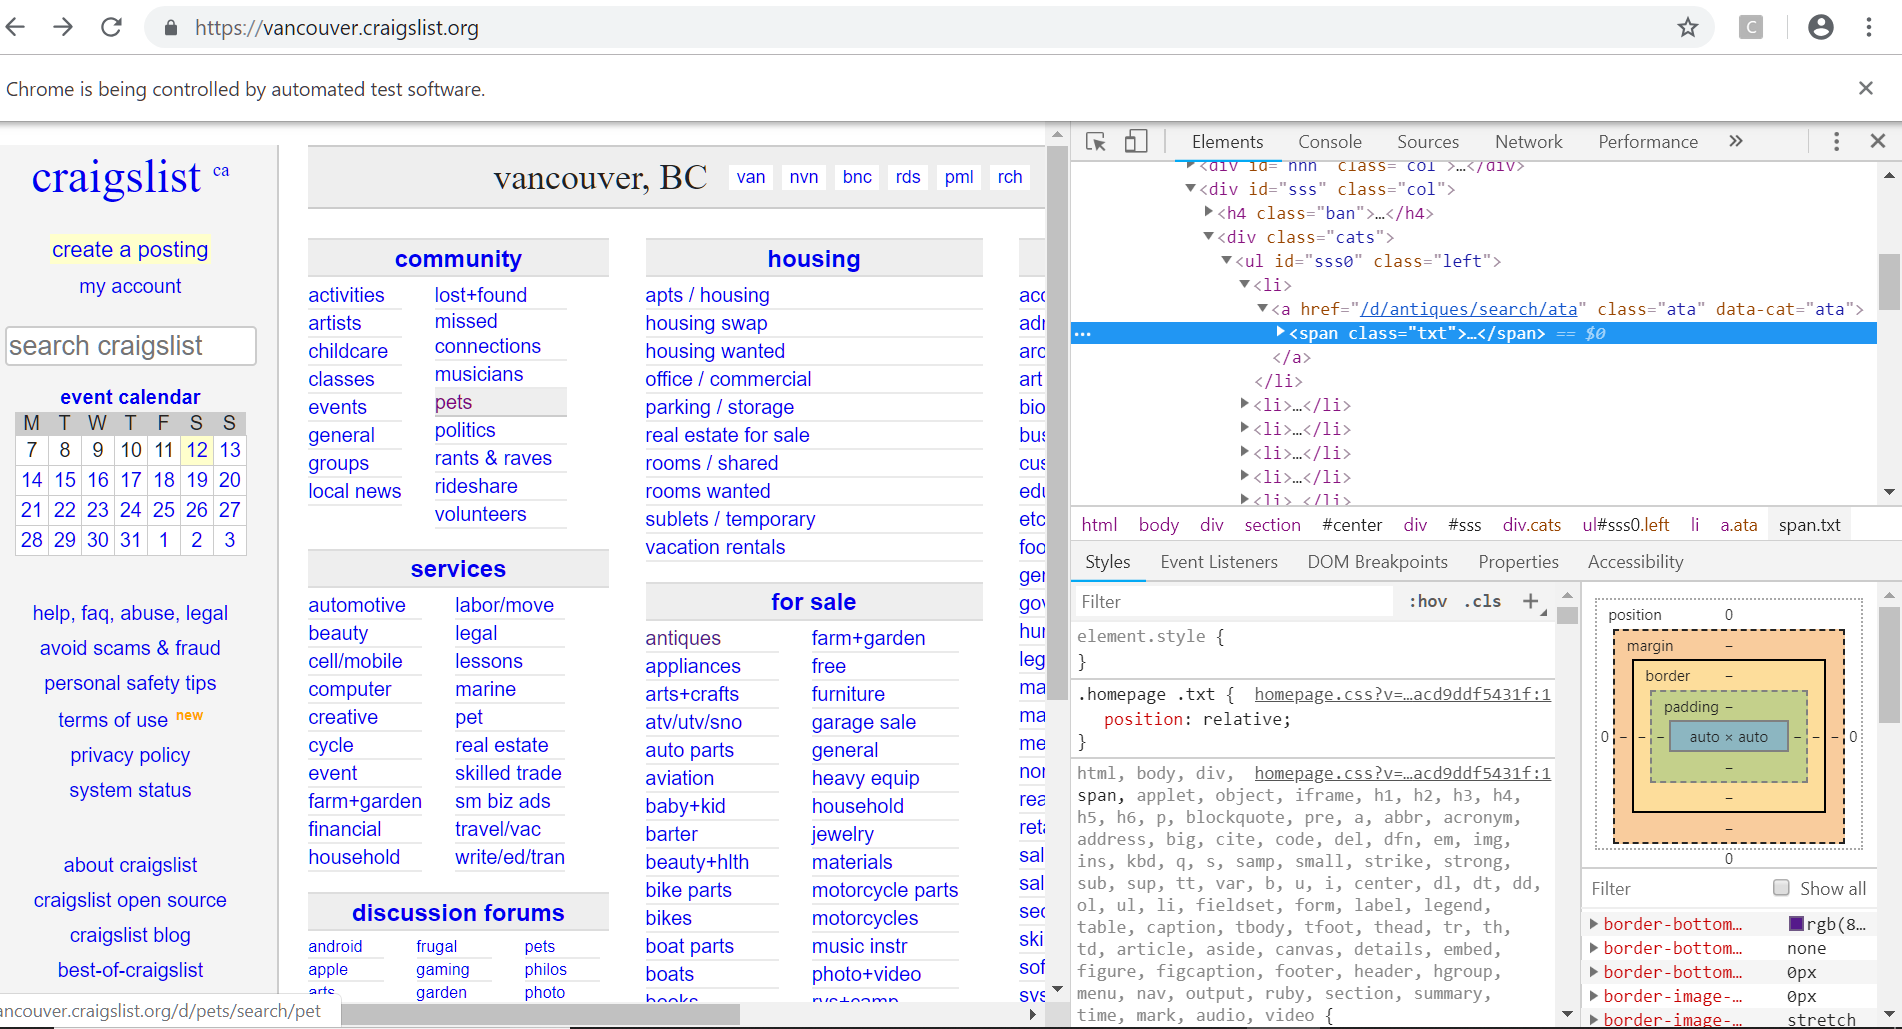

In [1]:
from IPython.display import Image, display
display(Image(filename='ScreenCapture.png', embed=True))

**Step 2:** *Instruct Chrome to click on the Antiques link*

In [3]:
# this is a link we want to open, paste the copied XPath here within triple quotes.
driver.find_element_by_xpath("""//*[@id="sss0"]/li[1]/a/span""").click()

**Step 3:** *Right click the link for any product and select inspect.* <br>
A new window pane will open and some text will be highlighted on it. In situations where we have many links of one type, it is better to work with the `find_elements_by_class_name`. This will find all similar links on the page. <br>

In this case, we see that within the text it says `class = result-title hdrlink`. Let's use this aspect to find all product names on the page.

In [4]:
# on the webpage, find all elements with this class and return their text
posts = driver.find_elements_by_class_name('hdrlnk')

post_text = []
for post in posts:
    post_text.append(post.text)

Hurray! In the `post_text` variable, we have succesfully scraped all product names from the craigslist page! WELL DONE!

### What if we want all links from all pages in craigslist?
1. This time let's use the Automotive link under the services tab.
2. For this link, we get a lot of 'next' buttons on the top.
3. We want to capture all the links on all the pages returned by the main link.

In [9]:
# open a website
driver = webdriver.Chrome(chrome_path)
driver.get("https://vancouver.craigslist.ca")

## Click on the page for Automotive services. Find the XPath as described above!
driver.find_element_by_xpath("""//*[@id="bbb0"]/li[1]/a/span""").click()

# get header links for these services and add to the post texts. Same as what we did for antique products.
auto_posts = driver.find_elements_by_class_name('hdrlnk')
auto_post_text = []

for post in auto_posts:
    auto_post_text.append(post.text)

# start a loop and keep looking for the next link until error encountered
keep_searching = True

while keep_searching:
    try:
        # this is the XPath for the 'Next' button
        driver.find_element_by_xpath("""//*[@id="searchform"]/div[3]/div[3]/span[2]/a[3]""").click()
        auto_posts = driver.find_elements_by_class_name('hdrlnk')
        for post in auto_posts:
            auto_post_text.append(post.text)
    except:
        keep_searching = False

We can do some processing with this text as well. Let's say we have to find the most frequent words used by ad posters.

In [10]:
# most commonly occuring words in the text extracted... remove punctuations and stopwords
auto_post_string = " ".join(auto_post_text)
for p in punctuation:
    auto_post_string = auto_post_string.lower().replace(p, "")
    
en_stopwords = stopwords.words('english')
tokens = word_tokenize(auto_post_string)

tokens_no_stopwords = [w for w in tokens if w not in en_stopwords]
nltk.FreqDist(tokens_no_stopwords)

FreqDist({'car': 91, 'towing': 71, 'scrap': 63, 'cash': 56, 'mobile': 54, 'removal': 53, 'service': 46, 'auto': 38, 'mechanic': 37, '247': 31, ...})

Now let's say for each automotive service listed, we want the whole text on the page. What do we do?

In [4]:
# open the craigslist website
driver.get("https://vancouver.craigslist.ca")

## Click on the page for Automotive services
driver.find_element_by_xpath("""//*[@id="bbb0"]/li[1]/a/span""").click()

# get header links for a service and click on it
driver.find_element_by_class_name('hdrlnk').click()

# get the body of the post
comp_text = driver.find_elements_by_id('postingbody')
full_ad = []
for text in comp_text:
    full_ad.append(text.text)

# keep looking for the 'next' button and keep extracting the body of the text. Stop if next not found.
keep_searching = True
while keep_searching:
    try:
        driver.find_element_by_xpath("""/html/body/section/section/header/div[1]/div/a[3]""").click()
        comp_text = driver.find_elements_by_id('postingbody')
        for text in comp_text:
            full_ad.append(text.text)
    except:
        keep_searching = False

In [6]:
corpus = " ".join(full_ad)
for p in punctuation:
    corpus = corpus.lower().replace(p, "")
    
en_stopwords = stopwords.words('english')
tokens = word_tokenize(corpus)

tokens_no_stopwords = [w for w in tokens if w not in en_stopwords]
tokens_nostop_lemm = [lmtzr.lemmatize(w) for w in tokens_no_stopwords]
nltk.FreqDist(tokens_nostop_lemm)

FreqDist({'car': 148478, 'cash': 123790, 'clunkers': 59740, 'junk': 56030, 'vehicle': 48191, 'auto': 43969, 'scrap': 40291, 'truck': 36154, 'towing': 36095, 'sell': 35872, ...})

### There you go!
You can now do many cool things with Selenium. I will use some of these in my analysis.